# Breast Ultrasound Image Classification Using CNN

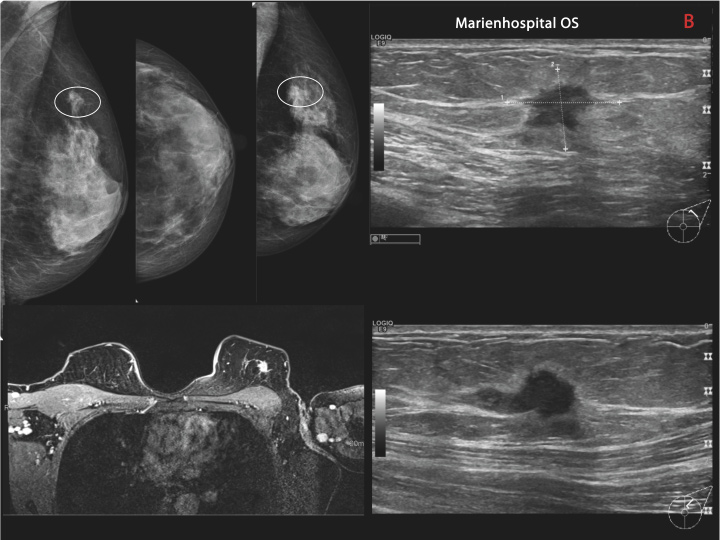

#### In This notebook we'll try to classify different breast ultrasound using convolutional neural network with tensorflow.

# What is CNN ? 

#### CNN is a powerful algorithm for image processing. These algorithms are currently the best algorithms we have for the automated processing of images. Many companies use these algorithms to do things like identifying the objects in an image.

# Three Layers of CNN

#### Convolutional Neural Networks specialized for applications in image & video recognition. CNN is mainly used in image analysis tasks like Image recognition, Object detection & Segmentation.

#### There are three types of layers in Convolutional Neural Networks:

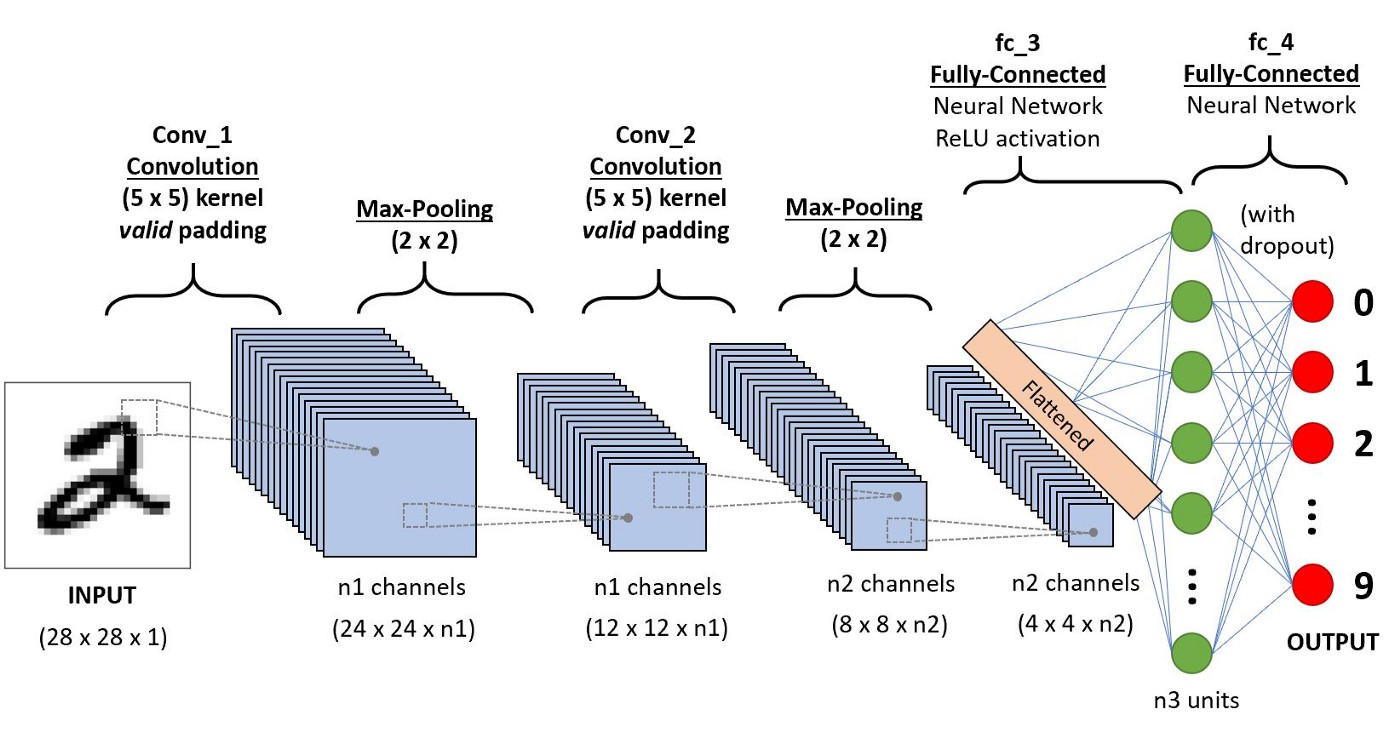

**1) Convolutional Layer:**

**In a typical neural network each input neuron is connected to the next hidden layer. In CNN, only a small region of the input layer neurons connect to the neuron hidden layer.**

**2) Pooling Layer:**

**The pooling layer is used to reduce the dimensionality of the feature map. There will be multiple activation & pooling layers inside the hidden layer of the CNN.**

**3) Fully-Connected layer:**

**Fully Connected Layers form the last few layers in the network. The input to the fully connected layer is the output from the final Pooling or Convolutional Layer, which is flattened and then fed into the fully connected layer.**

#### Let's Start ⌨️

# Data İmportation

**İmporting basic libraries**

In [1]:
import tensorflow as tf
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

**Defining the path**

In [2]:
path = r"C:\Users\Sai Madhu\OneDrive\Desktop\code\cancer cnn\Dataset_BUSI_with_GT"
data_dir = pathlib.Path(path)

**Getting class names**

In [3]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['benign', 'malignant', 'normal'], dtype='<U9')

**Define paths and image count**

In [4]:
benignPath = os.path.join(data_dir,'bening')
malignantPath = os.path.join(data_dir,'malignant')
normalPath = os.path.join(data_dir,'normal')

**İmage count**

In [5]:
imageCount = len(list(data_dir.glob('*/*.png')))
imageCount

1578

# Make Plotting of Random İmages

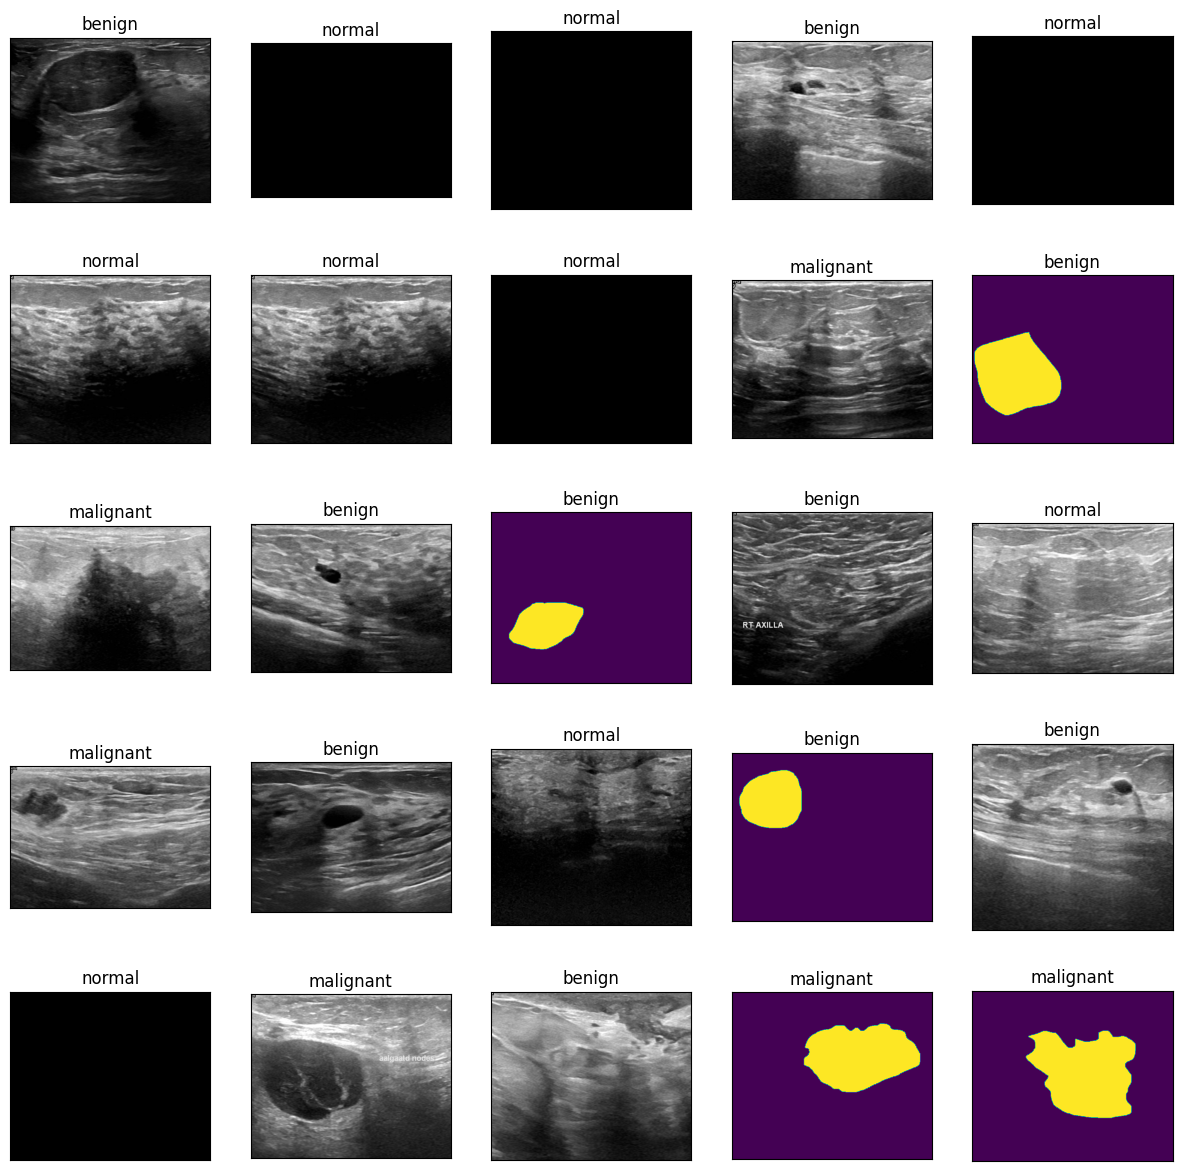

In [6]:
plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.png"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

**Check the image formats**

In [7]:
from pathlib import Path
import imghdr

data_dir = '../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/'
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

C:\Users\Sai Madhu\AppData\Local\Temp\ipykernel_30556\2661301603.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# Build the CNN

**Separating data sets**

In [8]:
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory

batch_size = 32
img_height = 224
img_width = 224

# Define the path
path = r"C:\Users\Sai Madhu\OneDrive\Desktop\code\cancer cnn\Dataset_BUSI_with_GT"
data_dir = pathlib.Path(path)

# Load training data
train_data = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load validation data
val_data = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 1578 files belonging to 3 classes.
Using 1263 files for training.
Found 1578 files belonging to 3 classes.
Using 315 files for validation.


# Define the Model

#### The model have 3 blocks where in each block we have one convolutional layer and a max pooling to understand CNN you can follow this link which provide a good understanding of the subject https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

**Roadmap**

##### We rescale images add a Dropout to avoid the overfitting as we have 4 class the last layer contain the number of class and we have softmax as activation,it will give us a pourcentage of each class and we'll choice the maximum pourcentage as the class

In [9]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

c:\Users\Sai Madhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the Model

In [10]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

**Use GPU to fit the model else it will take much more time**

In [11]:
epochs = 20
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/20


c:\Users\Sai Madhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.4976 - loss: 1.0484 - val_accuracy: 0.6984 - val_loss: 0.8064
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.6922 - loss: 0.7047 - val_accuracy: 0.6794 - val_loss: 0.6952
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7719 - loss: 0.5147 - val_accuracy: 0.7175 - val_loss: 0.7426
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8196 - loss: 0.4348 - val_accuracy: 0.7397 - val_loss: 0.7487
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8624 - loss: 0.3539 - val_accuracy: 0.7714 - val_loss: 0.7879
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8884 - loss: 0.2941 - val_accuracy: 0.7683 - val_loss: 0.8909
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9337 - loss: 0.2201 - val_accuracy: 0.7683 - val_loss: 1.0941
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9448 - loss: 0.1584 - val_accuracy: 0.7905 - val_

**Keys**

In [12]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# Accuracy vs Lost

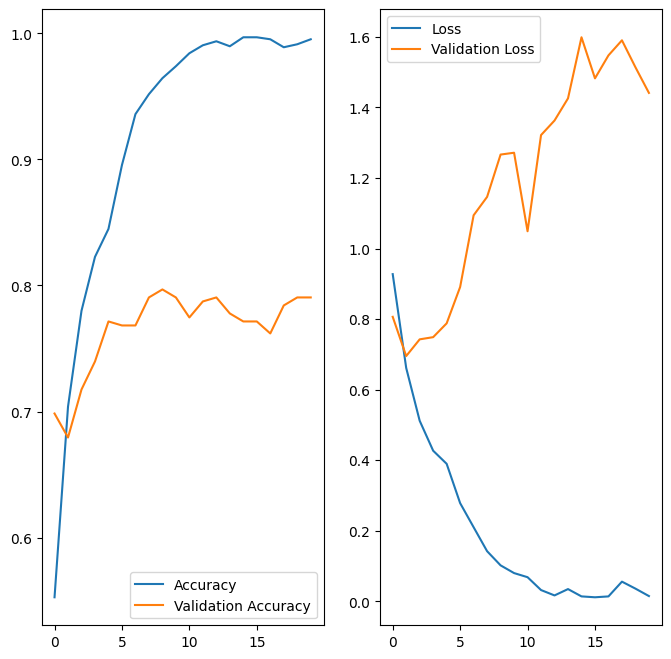

In [13]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

**Evaluating - İt return the lost and accuracy**

In [14]:
model.evaluate(val_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8120 - loss: 1.2536


[1.4341156482696533, 0.7904762029647827]

**Model summary**

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,339,883 (73.78 MB)

 Trainable params: 6,446,627 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,893,256 (49.18 MB)

# Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


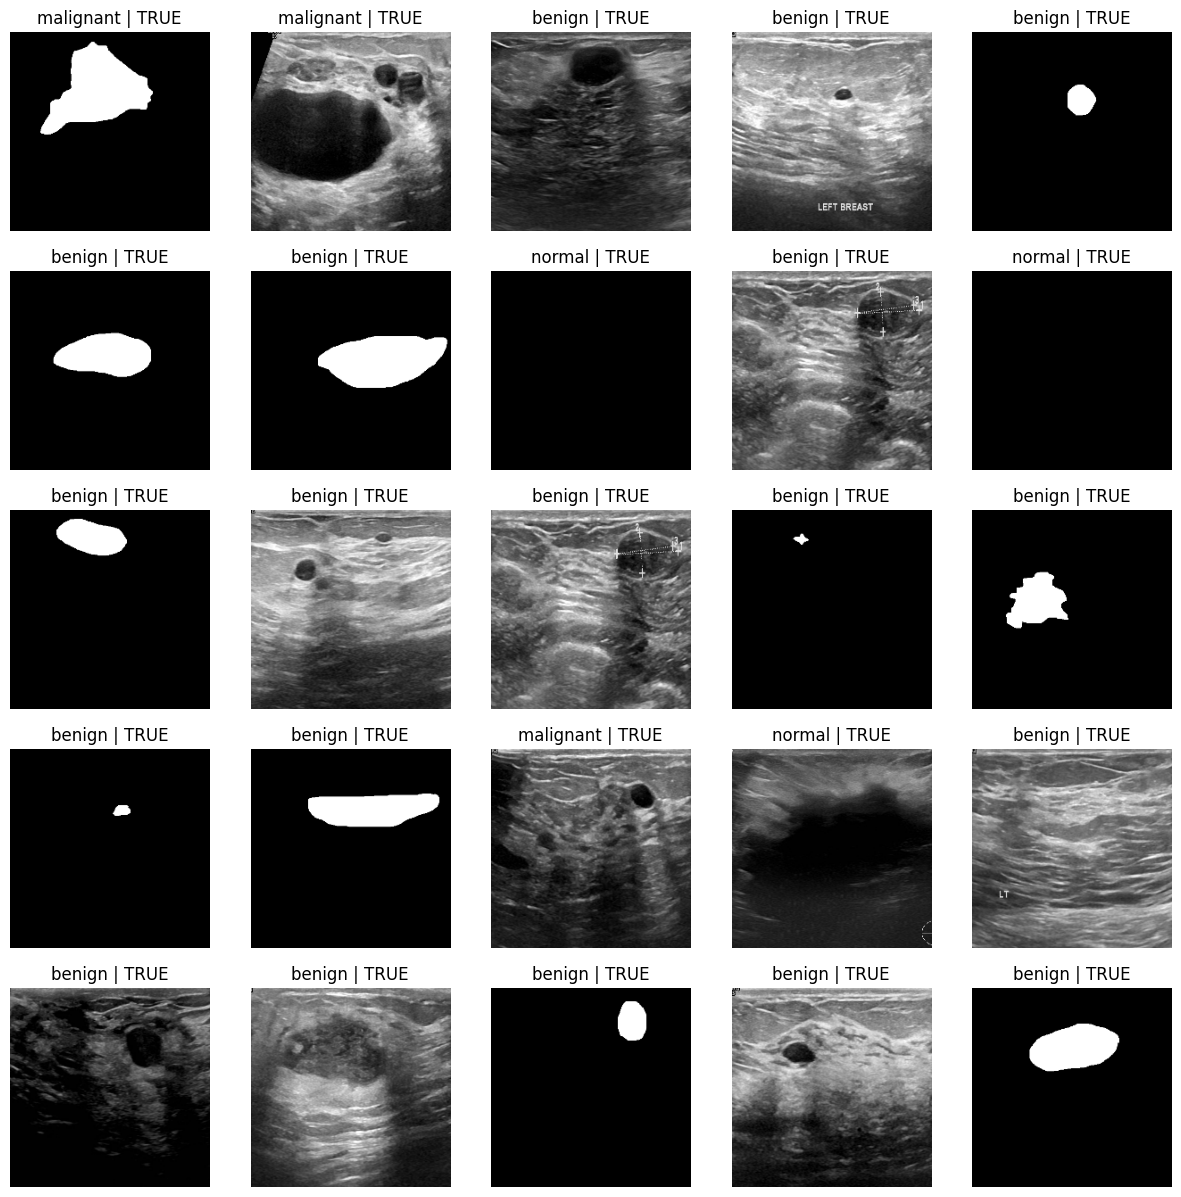

In [16]:
plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")

In [17]:
from sklearn.metrics import classification_report

# Collect true labels and predicted labels
true_labels = []
predicted_labels = []

for images, labels in val_data:
    true_labels.extend(labels.numpy())
    for image in images:
        img = tf.expand_dims(image, axis=0)
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        predicted_labels.append(predicted_class)

# Convert to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

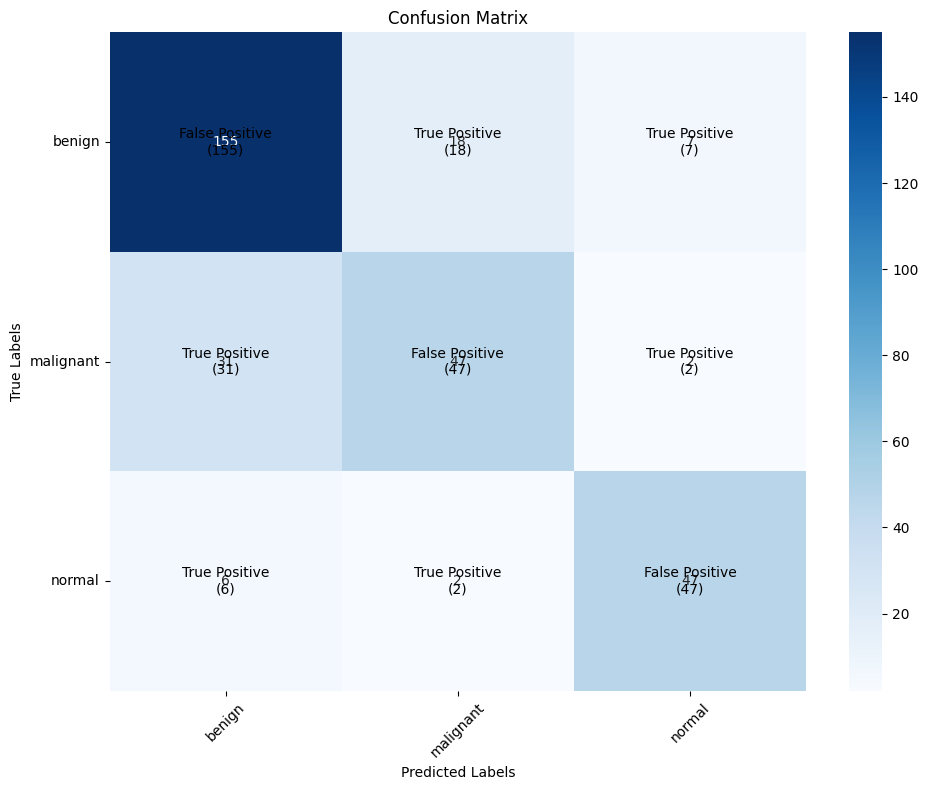

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Define labels for TP, FP, TN, FN
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)

# Add labels for TP, FP, TN, FN
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, f'{labels[2 * (i != j) + (conf_matrix[i, j] > 0)]}\n({conf_matrix[i, j]})',
                 horizontalalignment='center', verticalalignment='center', color='black')

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


In [19]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate accuracy
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print("Accuracy:", accuracy)

Accuracy: 0.7904761904761904


# THANKS FOR REVİEWİNG !!!